<a href="https://colab.research.google.com/github/AbdulxoliqMirzayev/Customer_curn_project/blob/main/Customer_curn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

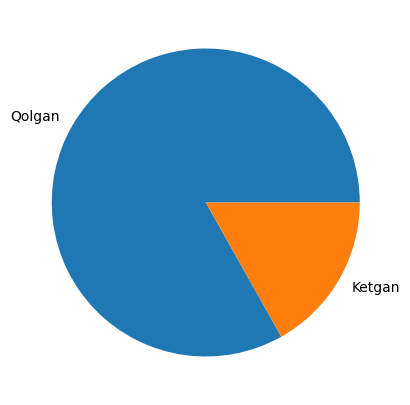

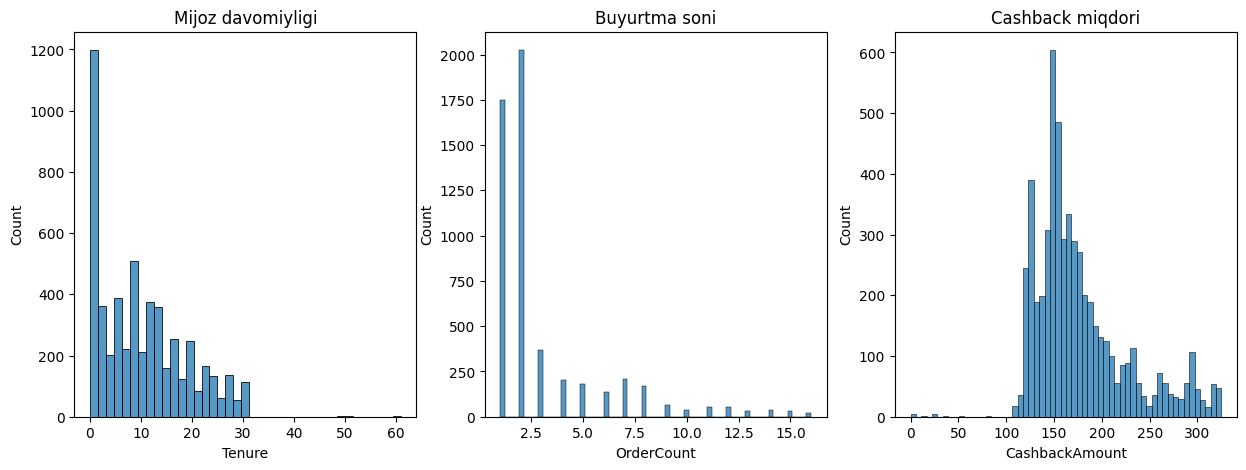

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

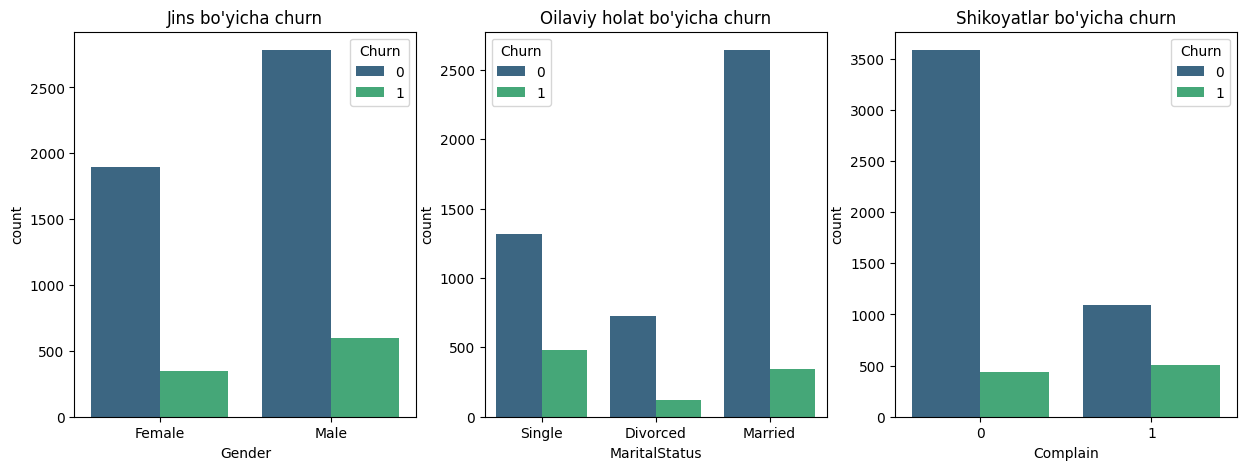

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar %: 33.0%
(5059, 7)
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Logistic Regression aniqligi: 0.8794466403162056


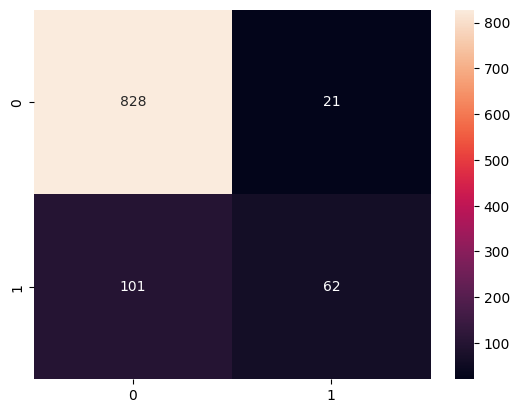

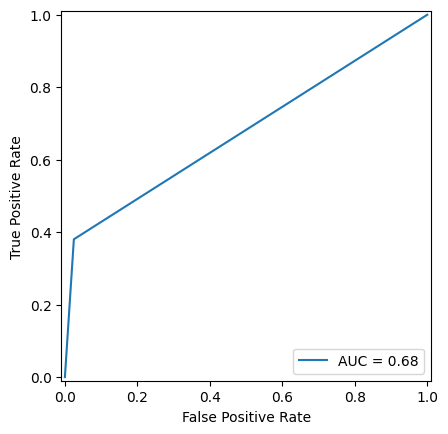

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.89      0.86       163

    accuracy                           0.95      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.95      0.96      1012

Decision Tree aniqligi: 0.9545454545454546


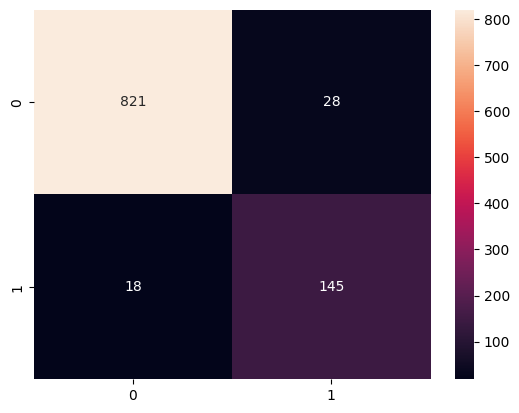

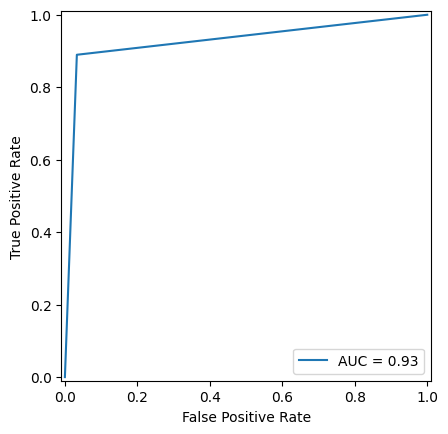

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


url = "https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="E Comm")


print(df.head())


print(df.shape)
print(df.info())


print(df.describe())


churn_rate = df['Churn'].value_counts() / len(df) * 100
plt.figure(figsize=(5, 5))
plt.pie(churn_rate, labels=['Qolgan', 'Ketgan'])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Buyurtma soni")

sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Cashback miqdori")

plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Jins bo'yicha churn")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Oilaviy holat bo'yicha churn")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Shikoyatlar bo'yicha churn")

plt.show()


print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows / len(df) * 100)}%")

data = df[['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'MaritalStatus', 'Gender']]
data = data.dropna()
print(data.shape)


encoded = pd.get_dummies(data)


X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)


y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Logistic Regression aniqligi:", metrics.accuracy_score(y_test, y_pred))


conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()


tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Decision Tree aniqligi:", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
